In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:

def Visualize_Predictions(original_clusters,cluster_ind,
                           n_models, center_predictions, v_models,n_clusters):
    
    n_samples = original_clusters.shape[0]
    n_cluster_points = original_clusters.shape[1]-(n_clusters*2)
    
    
    
    new_c1_x,new_c1_y,new_c2_x,new_c2_y = [],[],[],[]
    c1_x_orig = original_clusters[cluster_ind,n_cluster_points]
    c1_y_orig = original_clusters[cluster_ind,n_cluster_points+1]
    c2_x_orig = original_clusters[cluster_ind,n_cluster_points+2]
    c2_y_orig = original_clusters[cluster_ind,n_cluster_points+3]
    
    for i in range(0,n_cluster_points,2):
        a = original_clusters[cluster_ind,i]
        b = original_clusters[cluster_ind,i+1]
        dist_c1 = (a-c1_x_orig)*(a-c1_x_orig) + (b-c1_y_orig)*(b-c1_y_orig)
        dist_c2 = (a-c2_x_orig)*(a-c2_x_orig) + (b-c2_y_orig)*(b-c2_y_orig)
        
        if dist_c1<dist_c2:
            new_c1_x = new_c1_x+ [a]
            new_c1_y = new_c1_y+ [b]
        else:
            new_c2_x = new_c2_x+ [a]
            new_c2_y = new_c2_y+ [b]
    
    plt.figure()
    plt.plot(new_c1_x,new_c1_y,'b.')
    plt.plot(new_c2_x,new_c2_y,'r.')   
    if center_predictions==[]:
        pass
    else:
        specific_predictions = center_predictions[cluster_ind*n_models:cluster_ind*n_models+v_models,:]
        plt.plot(specific_predictions[:,0],specific_predictions[:,1],'yo')
        plt.plot(specific_predictions[:,2],specific_predictions[:,3],'ko')
        

    plt.title('Original clusters and predictions')
    plt.show()   
    
def Display_Results_For_Clustering_Representations(seed,type_repre,
                                                   sorting_comp,type_activation,cluster_ind_init,
                                                   n_models,n_gen,v_models,train_or_test,
                                                   n_samples_to_visualize,dataset,type_objective_function,n_clusters):
    
    train_original_clusters_file = '../datasets/new_clusters_data_train_sorting_'+str(dataset)+'_'+str(sorting_comp)+'_'+str(n_clusters)+'.npy'
    train_original_clusters = np.load(train_original_clusters_file)
    test_original_clusters_file = '../datasets/new_clusters_data_test_sorting_'+str(dataset)+'_'+str(sorting_comp)+'_'+str(n_clusters)+'.npy'
    test_original_clusters = np.load(test_original_clusters_file)



    if type_repre==0:
        prefix = 'new'
    else:
        prefix = 'pca'

    train_predictions_file = 'predictions/'+ dataset+ '_'+ prefix+'_Final_Train_Preds_'+str(seed)+'_'+str(sorting_comp)+'_'+str(type_repre)+'_'+str(type_activation)+'_'+str(n_models)+'_'+str(n_gen)+'_'+str(8)+'_'+str(8)+'_'+str(type_objective_function)+'_'+str(n_clusters)+'.npy'
    test_predictions_file = 'predictions/'+ dataset+ '_'+ prefix+'_Final_Test_Preds_'+str(seed)+'_'+str(sorting_comp)+'_'+str(type_repre)+'_'+str(type_activation)+'_'+str(n_models)+'_'+str(n_gen)+'_'+str(8)+'_'+str(8)+'_'+str(type_objective_function)+'_'+str(n_clusters)+'.npy'
    train_predictions = np.load(train_predictions_file)
    test_predictions = np.load(test_predictions_file)

    if train_or_test==1:
        for cluster_ind in range(cluster_ind_init,cluster_ind_init+n_samples_to_visualize):

            Visualize_Predictions(train_original_clusters,cluster_ind,
                                  n_models, train_predictions, v_models,n_clusters)
    else:
        for cluster_ind in range(cluster_ind_init,cluster_ind_init+n_samples_to_visualize):     
            Visualize_Predictions(test_original_clusters,cluster_ind,
                                  n_models, test_predictions, v_models,n_clusters)

In [51]:

def Visualize_Predictions(original_clusters, cluster_ind, n_models, center_predictions, v_models, n_clusters):
    n_samples = original_clusters.shape[0]
    n_cluster_points = original_clusters.shape[1] - (n_clusters * 2)

    # Initialize lists for storing points in each cluster
    cluster_x = [[] for _ in range(n_clusters)]
    cluster_y = [[] for _ in range(n_clusters)]

    # Extract cluster centers
    cluster_centers = []
    for k in range(n_clusters):
        c_x = original_clusters[cluster_ind, n_cluster_points + 2 * k]
        c_y = original_clusters[cluster_ind, n_cluster_points + 2 * k + 1]
        cluster_centers.append((c_x, c_y))

    # Assign each point to the nearest cluster center
    for i in range(0, n_cluster_points, 2):
        a = original_clusters[cluster_ind, i]
        b = original_clusters[cluster_ind, i + 1]

        # Calculate distance to each cluster center
        distances = [((a - c_x) ** 2 + (b - c_y) ** 2) for c_x, c_y in cluster_centers]
        nearest_cluster = np.argmin(distances)

        # Assign the point to the nearest cluster
        cluster_x[nearest_cluster].append(a)
        cluster_y[nearest_cluster].append(b)
    
    # cluster_x and cluster_y contain the points grouped by cluster
    # You can use these for plotting or further analysis

    # Example of using the clusters (e.g., print the number of points in each cluster)
    for k in range(n_clusters):
        print(f"Cluster {k}: {len(cluster_x[k])} points")
    
    # Plotting
    plt.figure()
    
    # Define a color map or list of colors
    colors = plt.cm.get_cmap('tab10', n_clusters)
    
    # Plot each cluster
    for k in range(n_clusters):
        plt.plot(cluster_x[k], cluster_y[k], '.', color=colors(k), label=f'Cluster {k+1}')
    
    # Plot center predictions if available
    if center_predictions==[]:
        pass
    else:
        specific_predictions = center_predictions[cluster_ind * n_models: cluster_ind * n_models + v_models, :]
        for i in range(0, n_clusters * 2, 2):
            plt.plot(specific_predictions[:, i], specific_predictions[:, i+1], 'o', label=f'Prediction {i//2+1}')

    plt.title('Original clusters and predictions')
    plt.legend()
    plt.show()

Cluster 0: 500 points
Cluster 1: 500 points
Cluster 2: 500 points


C:\Users\aitor\AppData\Local\Temp\ipykernel_13300\985094110.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_clusters)
C:\Users\aitor\AppData\Local\Temp\ipykernel_13300\985094110.py:47: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if center_predictions==[]:


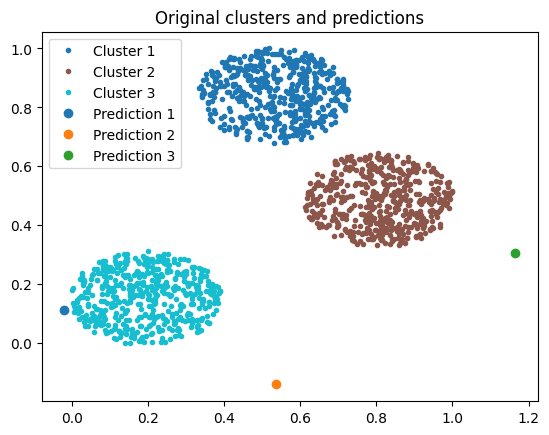

Cluster 0: 486 points
Cluster 1: 514 points
Cluster 2: 500 points


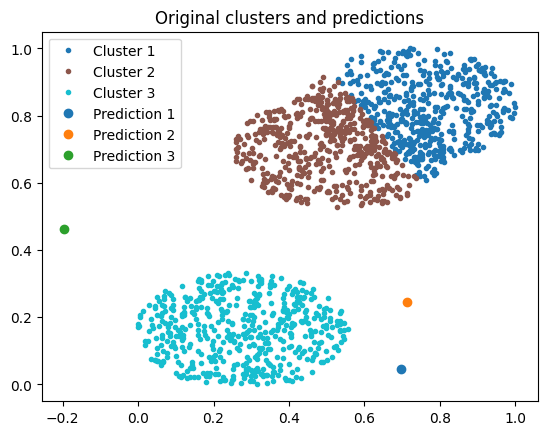

Cluster 0: 508 points
Cluster 1: 489 points
Cluster 2: 503 points


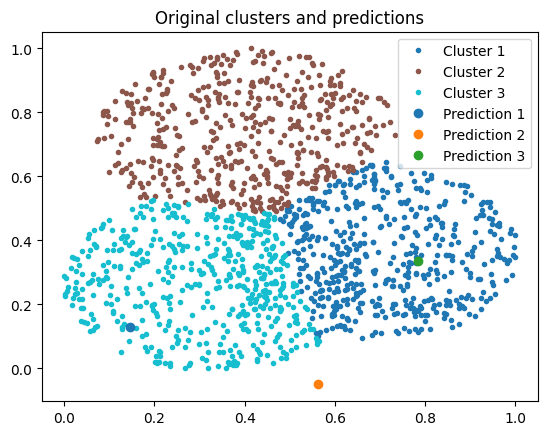

Cluster 0: 507 points
Cluster 1: 500 points
Cluster 2: 493 points


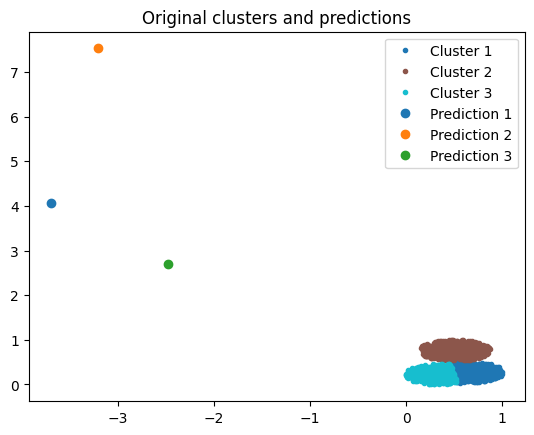

Cluster 0: 500 points
Cluster 1: 500 points
Cluster 2: 500 points


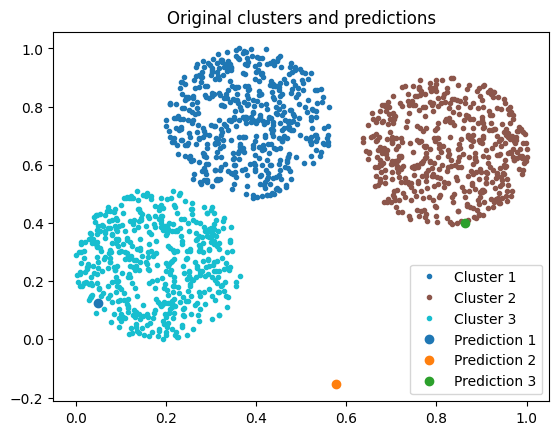

In [54]:
seed = 111                  # Seed for the Neuro-evolutionary algorithm
type_repre = 0              # Type of representation for clustering:
                            # 0: One variable for each coordinate of each point
                            # 1: PCA representation of all clusters (reduced dimens.)                                             
sorting_comp = 0            # Organization of points in an input to the neural network
                            # 0: points in each sample are organized by x axis
                            # 1: points in each sample are organized by y axis  
cluster_ind_init = 70       # Index for starting example of clustering to visualize
type_activation = 0                # Number of neural networks from the population whose
n_models = 4             # Number of models in the population
v_models = 1                            # predictions will visualized
train_or_test = 0         # Visualize predictions for train set (1) or test set (0)
n_samples_to_visualize = 5 # Number of clustering examples for which predictions are 
                            # visualized notebooks/predictions/new_Final_Test_Preds_111_0_0_0_30_30_8_8.npy
n_gen = 2
dataset = 'Circles_original'
type_objective_function = 2
n_clusters = 3
Display_Results_For_Clustering_Representations(seed,type_repre,
                                                   sorting_comp,type_activation,cluster_ind_init,
                                                   n_models,n_gen,v_models,train_or_test,
                                                   n_samples_to_visualize,dataset,type_objective_function,n_clusters)
#notebooks/predictions/Lines_new_Final_Test_Preds_121_0_0_0_50_20_8_8_1.npy

In [45]:
seed = 111                  # Seed for the Neuro-evolutionary algorithm
type_repre = 0              # Type of representation for clustering:
                            # 0: One variable for each coordinate of each point
                            # 1: PCA representation of all clusters (reduced dimens.)                                             
sorting_comp = 0            # Organization of points in an input to the neural network
                            # 0: points in each sample are organized by x axis
                            # 1: points in each sample are organized by y axis  
cluster_ind_init = 70       # Index for starting example of clustering to visualize
type_activation = 0                # Number of neural networks from the population whose
n_models = 4             # Number of models in the population
v_models = 6                            # predictions will visualized
train_or_test = 0         # Visualize predictions for train set (1) or test set (0)
n_samples_to_visualize = 2 # Number of clustering examples for which predictions are 
                            # visualized notebooks/predictions/new_Final_Test_Preds_111_0_0_0_30_30_8_8.npy
n_gen = 2
dataset = 'Circles_original'
type_objective_function = 2
n_clusters = 2
Display_Results_For_Clustering_Representations(seed,type_repre,
                                                   sorting_comp,type_activation,cluster_ind_init,
                                                   n_models,n_gen,v_models,train_or_test,
                                                   n_samples_to_visualize,dataset,type_objective_function,n_clusters)
#notebooks/predictions/Lines_new_Final_Test_Preds_121_0_0_0_50_20_8_8_1.npy

FileNotFoundError: [Errno 2] No such file or directory: 'predictions/Circles_original_new_Final_Train_Preds_111_0_0_0_4_2_8_8_2_2.npy'

C:\Users\aitor\AppData\Local\Temp\ipykernel_12800\1223385594.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if center_predictions==[]:


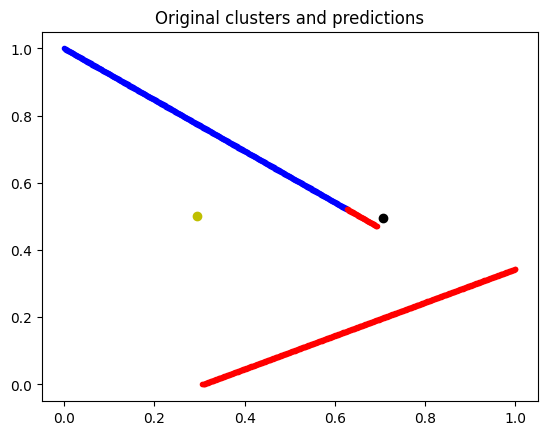

In [41]:
seed = 121                  # Seed for the Neuro-evolutionary algorithm
type_repre = 0              # Type of representation for clustering:
                            # 0: One variable for each coordinate of each point
                            # 1: PCA representation of all clusters (reduced dimens.)                                             
sorting_comp = 0            # Organization of points in an input to the neural network
                            # 0: points in each sample are organized by x axis
                            # 1: points in each sample are organized by y axis  
cluster_ind_init = 27       # Index for starting example of clustering to visualize
type_activation = 0                # Number of neural networks from the population whose
n_models = 50             # Number of models in the population
v_models = 1                            # predictions will visualized
train_or_test = 0         # Visualize predictions for train set (1) or test set (0)
n_samples_to_visualize = 1 # Number of clustering examples for which predictions are 
                            # visualized notebooks/predictions/new_Final_Test_Preds_111_0_0_0_30_30_8_8.npy
n_gen = 20
dataset = 'Lines'
type_objective_function = 1
Display_Results_For_Clustering_Representations(seed,type_repre,
                                                   sorting_comp,type_activation,cluster_ind_init,
                                                   n_models,n_gen,v_models,train_or_test,
                                                   n_samples_to_visualize,dataset,type_objective_function)
#notebooks/predictions/Lines_new_Final_Test_Preds_121_0_0_0_50_20_8_8_1.npy

C:\Users\aitor\AppData\Local\Temp\ipykernel_14912\649985898.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if center_predictions==[]:


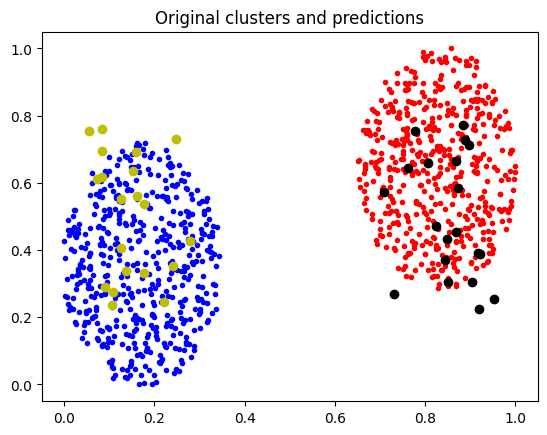

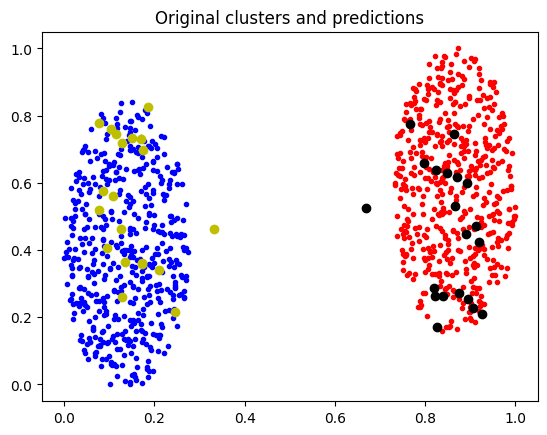

In [26]:
seed = 113                  # Seed for the Neuro-evolutionary algorithm
type_repre = 0              # Type of representation for clustering:
                            # 0: One variable for each coordinate of each point
                            # 1: PCA representation of all clusters (reduced dimens.)                                             
sorting_comp = 0            # Organization of points in an input to the neural network
                            # 0: points in each sample are organized by x axis
                            # 1: points in each sample are organized by y axis  
cluster_ind_init =21         # Index for starting example of clustering to visualize
type_activation = 0                # Number of neural networks from the population whose
n_models = 30               # Number of models in the population
v_models = 20                            # predictions will visualized
train_or_test = 1           # Visualize predictions for train set (1) or test set (0)
n_samples_to_visualize = 2 # Number of clustering examples for which predictions are 
                            # visualized notebooks/predictions/new_Final_Test_Preds_111_0_0_0_30_30_8_8.npy
n_gen = 30
dataset = 'Circles_original'
Display_Results_For_Clustering_Representations(seed,type_repre,
                                                   sorting_comp,type_activation,cluster_ind_init,
                                                   n_models,n_gen,v_models,train_or_test,
                                                   n_samples_to_visualize,dataset)


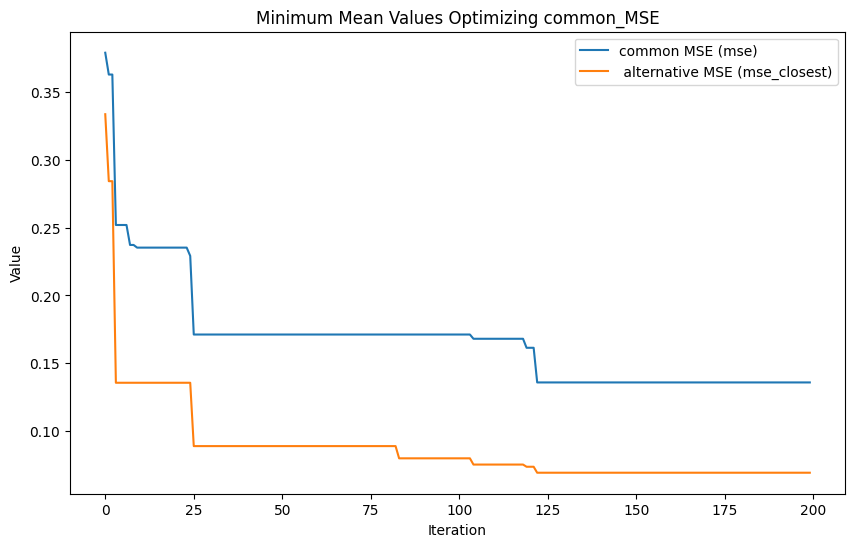

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the file
file_path = 'resultados/Lines_mean_MSE_f1.txt'
data = pd.read_csv(file_path, sep='\s+', header=None, names=['Column1', 'Column2'])
data = data[:200]
# Compute the cumulative minimums
min_so_far_column1 = data['Column1'].cummin()
min_so_far_column2 = data['Column2'].cummin()

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(min_so_far_column1, label='common MSE (mse)')
plt.plot(min_so_far_column2, label=' alternative MSE (mse_closest)')

# Add title and labels
plt.title('Minimum Mean Values Optimizing common_MSE')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.savefig('Values_Optimizing_common_MSE.png')

# Show the plot
plt.show()

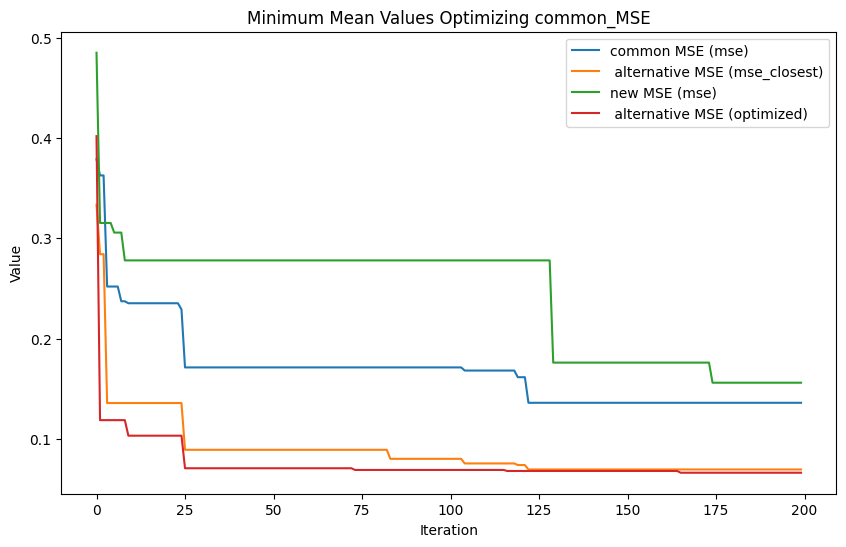

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the file
file_path = 'resultados/Lines_mean_MSE_f1.txt'
data = pd.read_csv(file_path, sep='\s+', header=None, names=['Column1', 'Column2'])
data = data[:200]

# Compute the cumulative minimums
min_so_far_column1 = data['Column1'].cummin()
min_so_far_column2 = data['Column2'].cummin()

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(min_so_far_column1, label='common MSE (mse)')
plt.plot(min_so_far_column2, label=' alternative MSE (mse_closest)')
# Read the data from the file
file_path = 'resultados/Lines_mean_MSE_f2.txt'
data = pd.read_csv(file_path, sep='\s+', header=None, names=['Column1', 'Column2'])
data = data[:200]

# Compute the cumulative minimums
min_so_far_column1 = data['Column1'].cummin()
min_so_far_column2 = data['Column2'].cummin()

# Create a plot
plt.plot(min_so_far_column1, label='new MSE (mse)')
plt.plot(min_so_far_column2, label=' alternative MSE (optimized)')
# Add title and labels
plt.title('Minimum Mean Values Optimizing common_MSE')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
#plt.savefig('Values_Optimizing_common_MSE.png')

# Show the plot
plt.show()